<a href="https://colab.research.google.com/github/AlejoTechEngineer/API-REST/blob/main/Clase2AprendizajeAutom%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coeficiente de correlación de Pearson: 0.6106270467206688
P-value: 0.00033883513597919785
Intercept: -2367.702841302211
Coeficiente: [('bateos', np.float64(0.5528713534479736))]
Coeficiente de determinación R^2: 0.3586119899498744


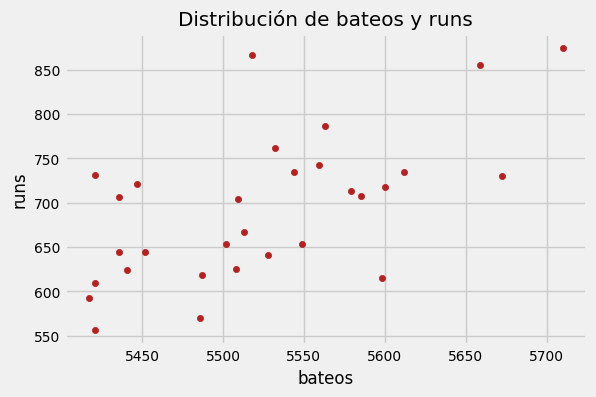

In [20]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm

# Configuración matplotlib
# ==============================================================================
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 10, 'lines.linewidth': 1.5})

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')


#ingreso de datos del problema y ejecutar para que muestre la tabla

# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]

bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

# Gráfico de distribución entre bateos y carreras anotadas
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');


# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print(f"Coeficiente de correlación de Pearson: {corr_test[0]}")
print(f"P-value: {corr_test[1]}")

#Un valor de 0 indica que no hay correlación
#Un valor entre 0 y 0.1 indica una correlación inexistente
#Un valor entre 0.1 y 0.29 indica una correlación débil
#Un valor entre 0.3 y 0.5 indica una correlación moderada
#Un valor entre 0.5 y 1.0 indica una correlación fuerte
#Un valor de 1 o -1 indica una correlación perfecta

# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

# Información del modelo
# ==============================================================================
print(f"Intercept: {modelo.intercept_}")
print(f"Coeficiente: {list(zip(modelo.feature_names_in_, modelo.coef_))}")
print(f"Coeficiente de determinación R^2:", modelo.score(X, y))

#El coeficiente de determinación, o R^2, es una medida estadística que se utiliza para evaluar la precisión de un modelo de regresión lineal.
#Se calcula en una escala de 0 a 1, donde 1 indica un ajuste perfecto y 0 indica un modelo sin valor predictivo
